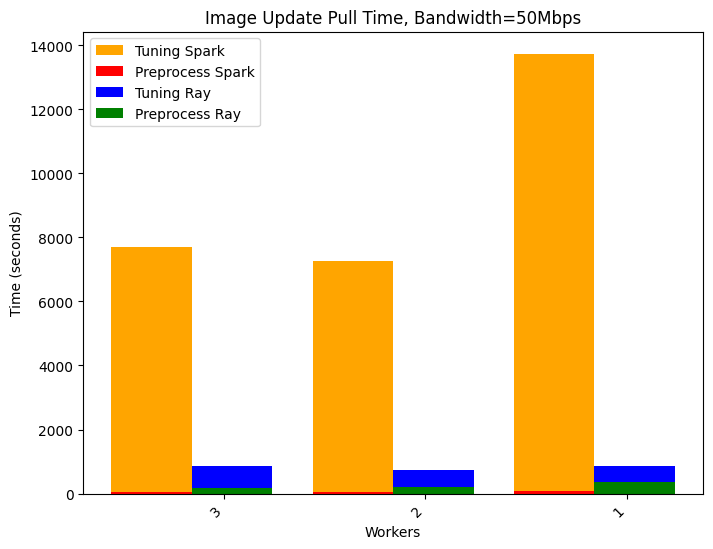

In [ ]:
proc = [167.47, 208.8, 355.44]
tot = [874.07, 725.75, 850.02]

procspark = [38.11, 46.62, 82.14]
totspark = [7708.77, 7250.22, 13740.25]

labels = ["3", "2", "1"]
# Bar width
bar_width = 0.4
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) +  bar_width, totspark, width=bar_width, label='Tuning Spark', color='orange')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(procspark)):
    bottom_value = 0
    ax.bar(np.array([i]) + bar_width, procspark[i], width=bar_width, color='red', bottom=bottom_value,
           label='Preprocess Spark' if i == 0 else "")

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) + 2 * bar_width, tot, width=bar_width, label='Tuning Ray', color='blue')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(proc)):
    bottom_value = 0
    ax.bar(np.array([i]) + 2*bar_width, proc[i], width=bar_width, color='green', bottom=bottom_value,
           label='Preprocess Ray' if i == 0 else "")
# Set labels and title
ax.set_xlabel('Workers')
ax.set_ylabel('Time (seconds)')
ax.set_title('Image Update Pull Time, Bandwidth=50Mbps')
ax.set_xticks(np.arange(len(labels)) + 1.9*bar_width)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Show the plot
plt.show()


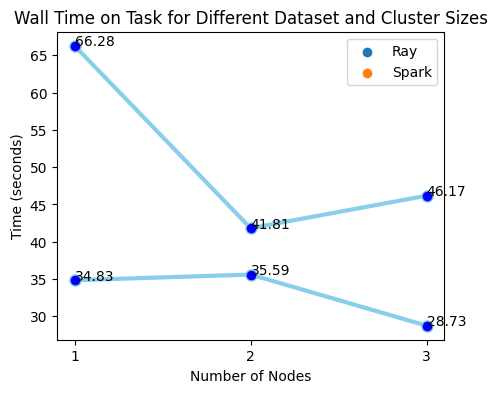

In [ ]:
import matplotlib.pyplot as plt

# Sample data
dataset_sizes = [2, 4]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
cpu_running_time = [
    [34.83, 35.59, 28.73],
    [66.28, 41.81, 46.17],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
   # CPU running time for 4GB dataset, 1, 2, 3 nodes
]

# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

for i, dataset_size in enumerate(dataset_sizes):
    ax.scatter(cluster_sizes, cpu_running_time[i], label=f"{'Ray' if i==0 else 'Spark'}")
    ax.plot(cluster_sizes, cpu_running_time[i], marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=3)

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Wall Time on Task for Different Dataset and Cluster Sizes')
ax.set_xticks(cluster_sizes)  # Set discrete axis ticks only at specified points
ax.legend()

# Annotating points with values
for i, dataset_size in enumerate(dataset_sizes):
    for j, cluster_size in enumerate(cluster_sizes):
        ax.annotate(cpu_running_time[i][j], (cluster_size, cpu_running_time[i][j]))

ax.grid(False)
plt.show()



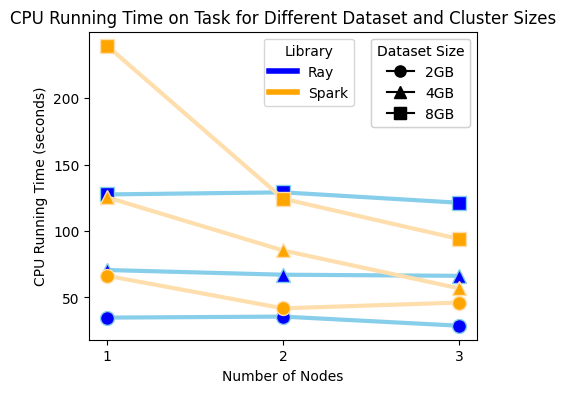

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
dataset_sizes = [2, 4, 8]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
ray_time = [
    [34.83, 35.59, 28.73],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [70.65, 67.11, 66.27],  # CPU running time for 4GB dataset, 1, 2, 3 nodes
    [127.52, 129.09, 121.26]   # CPU running time for 8GB dataset, 1, 2, 3 nodes
]

spark_time = [
    [66.28, 41.81, 46.17],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [125.37, 85.34, 56.84],  # CPU running time for 4GB dataset, 1, 2, 3 nodes
    [239.41, 124.26, 93.96]   # CPU running time for 8GB dataset, 1, 2, 3 nodes
]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

# Plot Ray's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, ray_time[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's' , markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3, label=f'Ray - {dataset_size}GB')

# Plot Spark's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, spark_time[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's',  markerfacecolor='orange', markersize=10 ,  color='navajowhite', linewidth=3, label=f'Spark - {dataset_size}GB')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('CPU Running Time (seconds)')
ax.set_title('CPU Running Time on Task for Different Dataset and Cluster Sizes')

# Set discrete axis ticks only at specified points
ax.set_xticks(cluster_sizes)

# Create custom legend
legend_1 = [
    Line2D([0], [0], marker='_', color='blue', markersize=8, linewidth=4, label='Ray'),
    Line2D([0], [0], marker='_', color='orange', markersize=8, linewidth=4,  label='Spark')
]

# Create custom legend
legend_2 = [
    Line2D([0], [0], marker='o', color='k', markersize=8, label='2GB'),
    Line2D([0], [0], marker='^', color='k', markersize=8, label='4GB'),
    Line2D([0], [0], marker='s', color='k', markersize=8, label='8GB'),
]

# Create two separate legends
legend1 = ax.legend(handles=legend_1, loc='upper right', bbox_to_anchor=(0.7, 1), title='Library', labels=['Ray', 'Spark'])
legend2 = ax.legend(handles=legend_2, loc='upper right',  title='Dataset Size', labels=['2GB', '4GB', '8GB'])

# Add both legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.show()


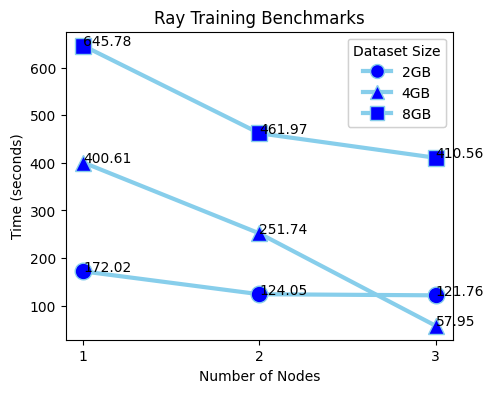

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
dataset_sizes = [2, 4, 8]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
ray_train_time = [
    [172.02, 124.05, 121.76],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [400.61, 251.74, 57.95],  # CPU running time for 4GB dataset, 1, 2, 3 nodes
    [645.78, 461.97, 410.56]   # CPU running time for 8GB dataset, 1, 2, 3 nodes
]



# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

# Plot Ray's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, ray_train_time[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's' , markerfacecolor='blue', markersize=12 , color='skyblue', linewidth=3, label=f'Ray - {dataset_size}GB')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Ray Training Benchmarks')

# Set discrete axis ticks only at specified points
ax.set_xticks(cluster_sizes)

# Create custom legend
legend_1 = [
    Line2D([0], [0], marker='_', color='blue', markersize=8, linewidth=4, label='Ray'),
    Line2D([0], [0], marker='_', color='orange', markersize=8, linewidth=4,  label='Spark')
]

# Create custom legend
legend_2 = [
    Line2D([0], [0], marker='o', markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3, label='2GB'),
    Line2D([0], [0], marker='^', markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3,   label='4GB'),
    Line2D([0], [0], marker='s', markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3,  label='8GB'),
]


legend2 = ax.legend(handles=legend_2, loc='upper right',  title='Dataset Size', labels=['2GB', '4GB', '8GB'])
ax.add_artist(legend2)

# Annotating points with values
for i, dataset_size in enumerate(dataset_sizes):
    for j, cluster_size in enumerate(cluster_sizes):
        ax.annotate(ray_train_time[i][j], (cluster_size, ray_train_time[i][j]))

plt.savefig('ray_train.pdf', bbox_inches='tight')
plt.show()


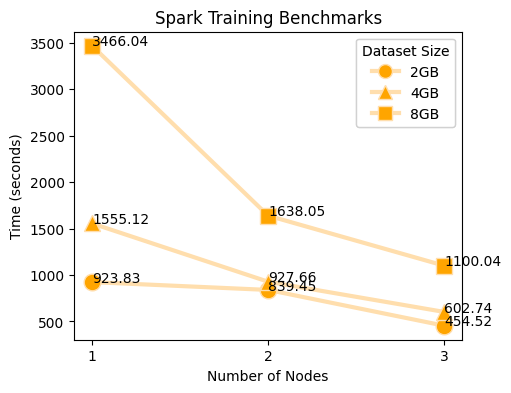

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
dataset_sizes = [2, 4, 8]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
ray_train_time = [
    [923.83, 839.45, 454.52],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [1555.12, 927.66, 602.74],  # CPU running time for 4GB dataset, 1, 2, 3 nodes
    [3466.04, 1638.05, 1100.04]   # CPU running time for 8GB dataset, 1, 2, 3 nodes
]



# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

# Plot Ray's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, ray_train_time[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's' , markerfacecolor='orange', markersize=12 , color='navajowhite', linewidth=3, label=f'Ray - {dataset_size}GB')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Spark Training Benchmarks')

# Set discrete axis ticks only at specified points
ax.set_xticks(cluster_sizes)

# Create custom legend
legend_1 = [
    Line2D([0], [0], marker='_', color='blue', markersize=8, linewidth=4, label='Ray'),
    Line2D([0], [0], marker='_', color='orange', markersize=8, linewidth=4,  label='Spark')
]

# Create custom legend
legend_2 = [
    Line2D([0], [0], marker='o', markerfacecolor='orange', markersize=10 , color='navajowhite', linewidth=3, label='2GB'),
    Line2D([0], [0], marker='^', markerfacecolor='orange', markersize=10 , color='navajowhite', linewidth=3,   label='4GB'),
    Line2D([0], [0], marker='s', markerfacecolor='orange', markersize=10 , color='navajowhite', linewidth=3,  label='8GB'),
]


legend2 = ax.legend(handles=legend_2, loc='upper right',  title='Dataset Size', labels=['2GB', '4GB', '8GB'])
ax.add_artist(legend2)

# Annotating points with values
for i, dataset_size in enumerate(dataset_sizes):
    for j, cluster_size in enumerate(cluster_sizes):
        ax.annotate(ray_train_time[i][j], (cluster_size, ray_train_time[i][j]))

plt.savefig('spark_train.pdf', bbox_inches='tight')
plt.show()


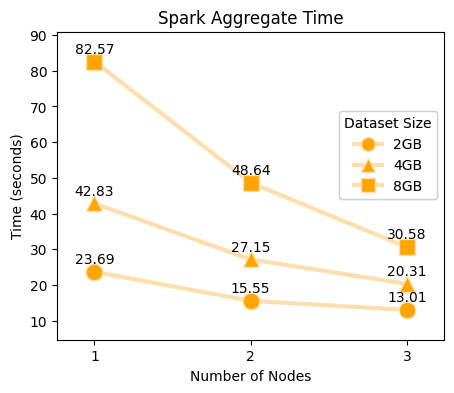

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
dataset_sizes = [2, 4, 8]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
agg_spark = [
    [23.69, 15.55, 13.01],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [42.83, 27.15, 20.31],  # CPU running time for 4GB dataset, 1, 2, 3 nodes
    [82.57, 48.64, 30.58]   # CPU running time for 8GB dataset, 1, 2, 3 nodes
]



# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

# Plot Ray's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, agg_spark[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's' , markerfacecolor='orange', markersize=12 , color='navajowhite', linewidth=3, label=f'Ray - {dataset_size}GB')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Spark Aggregate Time')

# Set discrete axis ticks only at specified points
ax.set_xticks(cluster_sizes)

# Create custom legend
legend_1 = [
    Line2D([0], [0], marker='_', color='blue', markersize=8, linewidth=4, label='Ray'),
    Line2D([0], [0], marker='_', color='orange', markersize=8, linewidth=4,  label='Spark')
]

# Create custom legend
legend_2 = [
    Line2D([0], [0], marker='o', markerfacecolor='orange', markersize=10 , color='navajowhite', linewidth=3, label='2GB'),
    Line2D([0], [0], marker='^', markerfacecolor='orange', markersize=10 , color='navajowhite', linewidth=3,   label='4GB'),
    Line2D([0], [0], marker='s', markerfacecolor='orange', markersize=10 , color='navajowhite', linewidth=3,  label='8GB'),
]


legend2 = ax.legend(handles=legend_2, loc='center right',  bbox_to_anchor=(1, 0.6), title='Dataset Size', labels=['2GB', '4GB', '8GB'])
ax.add_artist(legend2)

# Annotating points with values
for i, dataset_size in enumerate(dataset_sizes):
    for j, cluster_size in enumerate(cluster_sizes):
        ax.annotate(agg_spark[i][j], (cluster_size, agg_spark[i][j]), textcoords="offset points", xytext=(0,6), ha='center')
ax.margins(x=0.12, y=0.12)

plt.savefig('spark_agg.pdf', bbox_inches='tight')
plt.show()


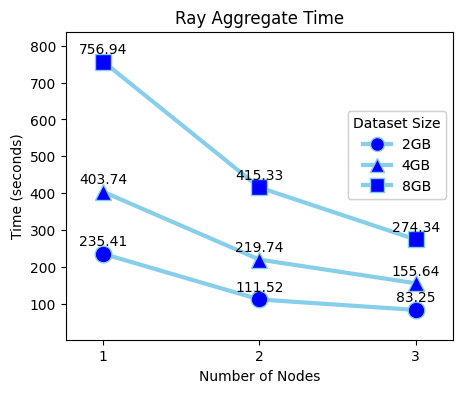

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
dataset_sizes = [2, 4, 8]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
agg_ray = [
    [235.41, 111.52, 83.25],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [403.74, 219.74, 155.64],  # CPU running time for 4GB dataset, 1, 2, 3 nodes
    [756.94, 415.33, 274.34]   # CPU running time for 8GB dataset, 1, 2, 3 nodes
]



# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

# Plot Ray's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, agg_ray[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's' , markerfacecolor='blue', markersize=12 , color='skyblue', linewidth=3, label=f'Ray - {dataset_size}GB')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Ray Aggregate Time')

# Set discrete axis ticks only at specified points
ax.set_xticks(cluster_sizes)

# Create custom legend
legend_1 = [
    Line2D([0], [0], marker='_', color='blue', markersize=8, linewidth=4, label='Ray'),
    Line2D([0], [0], marker='_', color='orange', markersize=8, linewidth=4,  label='Spark')
]

# Create custom legend
legend_2 = [
    Line2D([0], [0], marker='o', markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3, label='2GB'),
    Line2D([0], [0], marker='^', markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3,   label='4GB'),
    Line2D([0], [0], marker='s', markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3,  label='8GB'),
]


legend2 = ax.legend(handles=legend_2, loc='center right',  bbox_to_anchor=(1, 0.6), title='Dataset Size', labels=['2GB', '4GB', '8GB'])
ax.add_artist(legend2)

# Annotating points with values
for i, dataset_size in enumerate(dataset_sizes):
    for j, cluster_size in enumerate(cluster_sizes):
        ax.annotate(agg_ray[i][j], (cluster_size, agg_ray[i][j]), textcoords="offset points", xytext=(0,6), ha='center')
ax.margins(x=0.12, y=0.12)

plt.savefig('ray_agg.pdf', bbox_inches='tight')
plt.show()


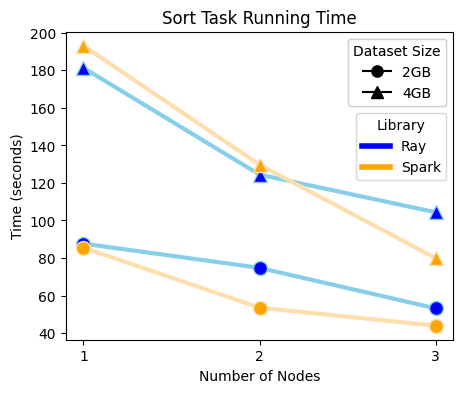

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Sample data
dataset_sizes = [2, 4]  # in GB
cluster_sizes = [1, 2, 3]  # number of nodes
sort_ray_time = [
    [87.66, 74.75, 53.17],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [181.34, 124.44, 104.37]  # CPU running time for 4GB dataset, 1, 2, 3 nodes
]

sort_spark_time = [
    [85.52, 53.53, 43.92],  # CPU running time for 2GB dataset, 1, 2, 3 nodes
    [193.13, 129.71, 79.88]  # CPU running time for 4GB dataset, 1, 2, 3 nodes
]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

# Plot Ray's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, sort_ray_time[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's' , markerfacecolor='blue', markersize=10 , color='skyblue', linewidth=3, label=f'Ray - {dataset_size}GB')

# Plot Spark's lines with different markers and sizes
for i, dataset_size in enumerate(dataset_sizes):
    ax.plot(cluster_sizes, sort_spark_time[i], marker='o' if dataset_size == 2 else '^' if dataset_size == 4 else 's',  markerfacecolor='orange', markersize=10 ,  color='navajowhite', linewidth=3, label=f'Spark - {dataset_size}GB')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Sort Task Running Time')

# Set discrete axis ticks only at specified points
ax.set_xticks(cluster_sizes)

# Create custom legend
legend_1 = [
    Line2D([0], [0], marker='_', color='blue', markersize=8, linewidth=4, label='Ray'),
    Line2D([0], [0], marker='_', color='orange', markersize=8, linewidth=4,  label='Spark')
]

# Create custom legend
legend_2 = [
    Line2D([0], [0], marker='o', color='k', markersize=8, label='2GB'),
    Line2D([0], [0], marker='^', color='k', markersize=8, label='4GB')
]

# Create two separate legends
legend1 = ax.legend(handles=legend_1, loc='upper right', bbox_to_anchor=(1, 0.758), title='Library', labels=['Ray', 'Spark'])
legend2 = ax.legend(handles=legend_2, loc='upper right',  title='Dataset Size', labels=['2GB', '4GB', '8GB'])

# Add both legends to the plot
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.savefig('sort.pdf', bbox_inches='tight')

plt.show()


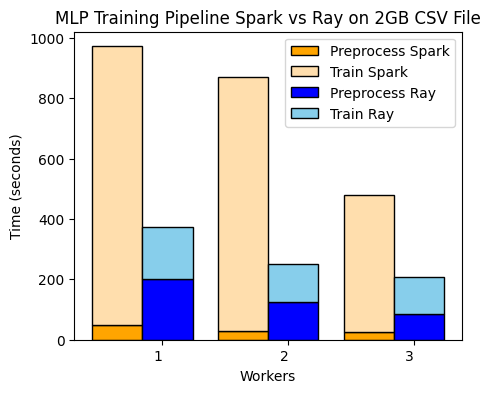

In [ ]:
import numpy as np
proc_ray = [201.31, 125.91, 85.53]
train_ray = [172.02, 124.01, 121.76]

proc_spark = [47.76, 29.74, 24.67]
train_spark = [923.83, 839.45, 454.52]

labels = ["1", "2", "3"]
# Bar width
bar_width = 0.4
# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 4))

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) +  bar_width, proc_spark, width=bar_width, label='Preprocess Spark', color='orange', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_spark)):
    bottom_value = 0
    ax.bar(np.array([i]) + bar_width, train_spark[i], width=bar_width, color='navajowhite', bottom=proc_spark[i], edgecolor = 'black',
           label='Train Spark' if i == 0 else "")

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) + 2 * bar_width, proc_ray, width=bar_width, label='Preprocess Ray', color='blue', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_ray)):
    ax.bar(np.array([i]) + 2*bar_width, train_ray[i], width=bar_width, color='skyblue', bottom=proc_ray[i], edgecolor = 'black',
           label='Train Ray' if i == 0 else "")
# Set labels and title
ax.set_xlabel('Workers')
ax.set_ylabel('Time (seconds)')
ax.set_title('MLP Training Pipeline Spark vs Ray on 2GB CSV File')
ax.set_xticks(np.arange(len(labels)) + 1.9*bar_width)
ax.set_xticklabels(labels, ha="right")
ax.legend()
plt.savefig('trainbar.pdf', bbox_inches='tight')

# Show the plot
plt.show()


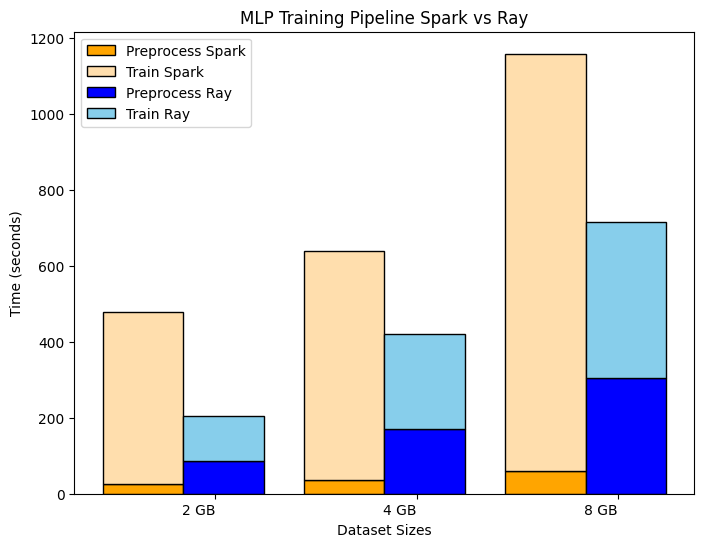

In [ ]:
import numpy as np
proc_spark = [24.67, 36.41, 58.95]
train_spark = [454.52, 602, 1100]

proc_ray = [85, 171, 305]
train_ray = [121, 251, 410]

labels = ["2 GB", "4 GB", "8 GB"]
# Bar width
bar_width = 0.4
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) +  bar_width, proc_spark, width=bar_width, label='Preprocess Spark', color='orange', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_spark)):
    bottom_value = 0
    ax.bar(np.array([i]) + bar_width, train_spark[i], width=bar_width, color='navajowhite', bottom=proc_spark[i], edgecolor = 'black',
           label='Train Spark' if i == 0 else "")

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) + 2 * bar_width, proc_ray, width=bar_width, label='Preprocess Ray', color='blue', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_ray)):
    ax.bar(np.array([i]) + 2*bar_width, train_ray[i], width=bar_width, color='skyblue', bottom=proc_ray[i], edgecolor = 'black',
           label='Train Ray' if i == 0 else "")
# Set labels and title
ax.set_xlabel('Dataset Sizes')
ax.set_ylabel('Time (seconds)')
ax.set_title('MLP Training Pipeline Spark vs Ray')
ax.set_xticks(np.arange(len(labels)) + 1.9*bar_width)
ax.set_xticklabels(labels, ha="right")
ax.legend()

# Show the plot
plt.show()


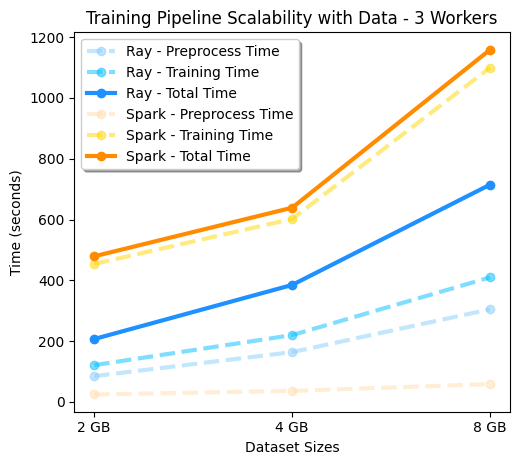

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

proc_spark = [24.67, 36.41, 58.95]
train_spark = [454, 602, 1100]
total_spark = [479,639,1159]

proc_ray = [85, 164, 305]
train_ray = [121, 220, 410]
total_ray = [207, 385, 715]

dataset_sizes = [1, 2, 3]
labels = ["2 GB", "4 GB", "8 GB"]


# Plotting
fig, ax = plt.subplots(figsize=(5.3, 4.75))
ax.plot(dataset_sizes, proc_ray, marker='o' , markerfacecolor='lightskyblue', markersize=6 , color='lightskyblue', alpha=0.5, linestyle='--',linewidth=3, label=f'Ray - Preprocess Time')
ax.plot(dataset_sizes, train_ray, marker='o' , markerfacecolor='deepskyblue', markersize=6, color='deepskyblue', alpha=0.5, linestyle='--',linewidth=3, label=f'Ray - Training Time')
ax.plot(dataset_sizes, total_ray, marker='o' , markerfacecolor='dodgerblue', markersize=6 , color='dodgerblue', linewidth=3, label=f'Ray - Total Time')

ax.plot(dataset_sizes, proc_spark, marker='o' ,  markerfacecolor='navajowhite', markersize=6,  color='navajowhite', alpha=0.5, linestyle='--',linewidth=3, label=f'Spark - Preprocess Time')
ax.plot(dataset_sizes, train_spark, marker='o' ,  markerfacecolor='gold', markersize=6 ,  color='gold', linewidth=3, alpha=0.5,linestyle='--', label=f'Spark - Training Time')
ax.plot(dataset_sizes, total_spark, marker='o' ,  markerfacecolor='darkorange', markersize=6,  color='darkorange', linewidth=3,label=f'Spark - Total Time')

# Set labels and title
ax.set_xlabel('Dataset Sizes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Training Pipeline Scalability with Data - 3 Workers')
#ax.legend(loc='lower center', bbox_to_anchor=(1, 1), title='Legend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True, ncol=1)
# Set discrete axis ticks only at specified points
ax.set_xticks(dataset_sizes)


ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('trainscal.pdf', bbox_inches='tight')

plt.show()

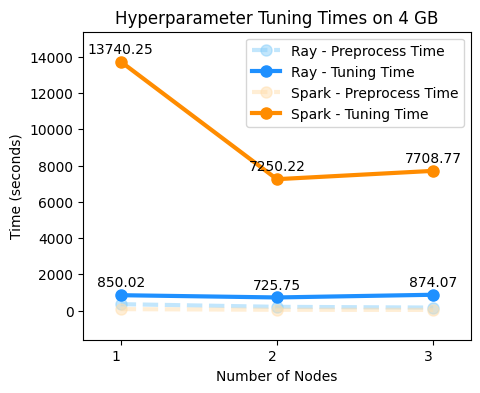

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

tune_spark = [13740.25, 7250.22, 7708.77]
proc_spark = [82, 46, 38]
tune_ray = [850.02, 725.75, 874.07]
proc_ray = [355, 208, 167]

dataset_sizes = [1, 2, 3]
labels = ["1", "2", "3"]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(dataset_sizes, proc_ray, marker='o' , markerfacecolor='lightskyblue', markersize=8 , color='lightskyblue', alpha=0.5, linestyle='--',linewidth=3, label=f'Ray - Preprocess Time')
ax.plot(dataset_sizes, tune_ray, marker='o' , markerfacecolor='dodgerblue', markersize=8 ,  color='dodgerblue', linewidth=3, label=f'Ray - Tuning Time')

ax.plot(dataset_sizes, proc_spark, marker='o' ,  markerfacecolor='navajowhite', markersize=8,  color='navajowhite', alpha=0.5, linestyle='--',linewidth=3, label=f'Spark - Preprocess Time')
ax.plot(dataset_sizes, tune_spark, marker='o' ,  markerfacecolor='darkorange', markersize=8,   color='darkorange', linewidth=3, label=f'Spark - Tuning Time')


# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Time (seconds)')
ax.set_title('Hyperparameter Tuning Times on 4 GB')
ax.legend(loc='upper right')

# Set discrete axis ticks only at specified points
ax.set_xticks(dataset_sizes)


# Annotating points with values
for i, dataset_size in enumerate(dataset_sizes):
    ax.annotate(tune_spark[i], (dataset_size, tune_spark[i]), textcoords="offset points", xytext=(0,6), ha='center')
    ax.annotate(tune_ray[i], (dataset_size, tune_ray[i]), textcoords="offset points", xytext=(0,6), ha='center')
ax.margins(x=0.12, y=0.12)
ax.set_xticklabels(labels, ha="right")
plt.savefig('tune.pdf')

plt.show()

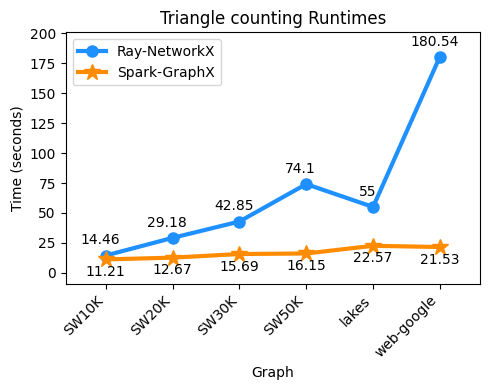

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

triangles_ray = [14.46, 29.18, 42.85, 74.1, 55, 180.54]

triangles_spark = [11.21, 12.67, 15.69, 16.15, 22.57, 21.53]

labels = ["SW10K", "SW20K", "SW30K", "SW50K", "lakes", "web-google"]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(labels, triangles_ray, marker='o' , markerfacecolor='dodgerblue', markersize=8 ,  color='dodgerblue', linewidth=3, label=f'Ray-NetworkX')

ax.plot(labels, triangles_spark, marker='*' ,  markerfacecolor='darkorange', markersize=12,   color='darkorange', linewidth=3, label=f'Spark-GraphX')


# Set labels and title
ax.set_xlabel('Graph')
ax.set_ylabel('Time (seconds)')
ax.set_title('Triangle counting Runtimes')
ax.legend(loc='upper left')

# Set discrete axis ticks only at specified points
ax.set_xticks(labels)

# Annotating points with values
for i, dataset_size in enumerate(labels):
    ax.annotate(triangles_spark[i], (dataset_size, triangles_spark[i]), textcoords="offset points", xytext=(0,-12), ha='center')
    ax.annotate(triangles_ray[i], (dataset_size, triangles_ray[i]), textcoords="offset points", xytext=(-4,8), ha='center')

ax.margins(x=0.12, y=0.12)
ax.set_xticklabels(labels, rotation=45, ha="right")
plt.tight_layout()
plt.savefig('triangles.pdf')

plt.show()


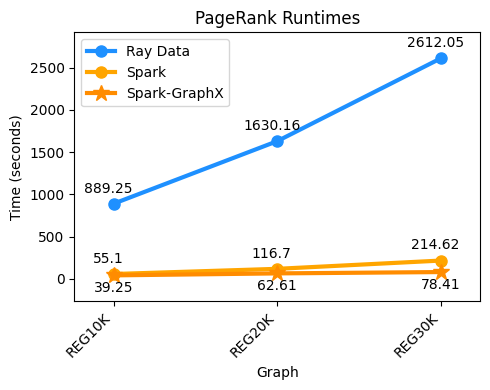

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

triangles_ray = [889.25, 1630.16, 2612.05]

triangles_spark = [55.1, 116.7, 214.62]

triangles_spark_graphx = [39.25, 62.61, 78.41]

labels = ["SW10K", "SW20K", "SW30K"]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(labels, triangles_ray, marker='o' , markerfacecolor='dodgerblue', markersize=8 ,  color='dodgerblue', linewidth=3, label=f'Ray Data')

ax.plot(labels, triangles_spark, marker='o' ,  markerfacecolor='orange', markersize=8,   color='orange', linewidth=3, label=f'Spark')

ax.plot(labels, triangles_spark_graphx, marker='*' ,  markerfacecolor='darkorange', markersize=12,   color='darkorange', linewidth=3, label=f'Spark-GraphX')


# Set labels and title
ax.set_xlabel('Graph')
ax.set_ylabel('Time (seconds)')
ax.set_title('PageRank Runtimes')
ax.legend(loc='upper left')

# Set discrete axis ticks only at specified points
ax.set_xticks(labels)

# Annotating points with values
for i, dataset_size in enumerate(labels):
    ax.annotate(triangles_spark[i], (dataset_size, triangles_spark[i]), textcoords="offset points", xytext=(-4,8), ha='center')
    ax.annotate(triangles_ray[i], (dataset_size, triangles_ray[i]), textcoords="offset points", xytext=(-4,8), ha='center')
    ax.annotate(triangles_spark_graphx[i], (dataset_size, triangles_spark_graphx[i]), textcoords="offset points", xytext=(0,-12), ha='center')

ax.margins(x=0.12, y=0.12)
ax.set_xticklabels(labels, rotation=45, ha="right")
plt.tight_layout()
plt.savefig('pagerank.pdf')

plt.show()


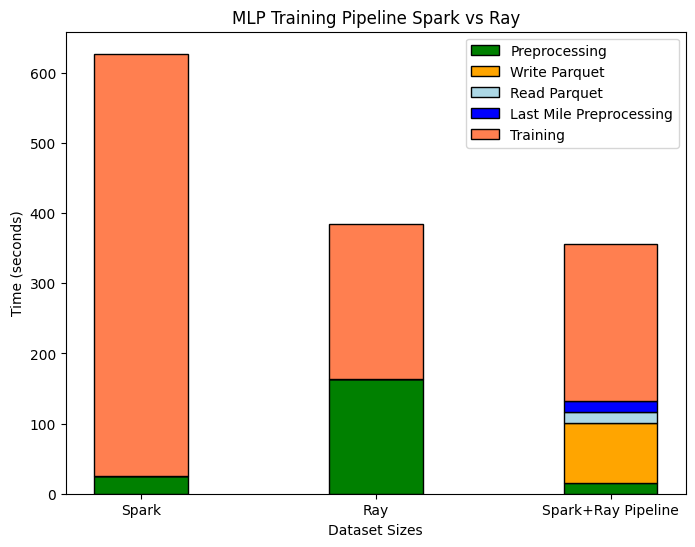

In [ ]:
import numpy as np
preproccessing = [24.67, 164.22, 15.41] # Spark, Ray, Pipeline

write_parquet = [0,0,85.31]
read_parquet = [0,0,15.87]
last_mile_prep = [0,0,15.41]

training = [602.74, 220.95, 224.04]

labels = ["Spark", "Ray", "Spark+Ray Pipeline"]
# Bar width
bar_width = 0.4
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

colors_edge = ['orange', 'blue', 'green']

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)), preproccessing, width=bar_width, label='Preprocessing', color='green', edgecolor = 'black')


bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), write_parquet[i], width=bar_width, color='orange', bottom=preproccessing[i], edgecolor = 'black',
           label='Write Parquet' if i == 0 else "")


bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), read_parquet[i], width=bar_width, color='lightblue', bottom=write_parquet[i]+preproccessing[i], edgecolor = 'black',
           label='Read Parquet' if i == 0 else "")


bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), last_mile_prep[i], width=bar_width, color='blue', bottom=read_parquet[i]+write_parquet[i]+preproccessing[i], edgecolor = 'black',
           label='Last Mile Preprocessing' if i == 0 else "")


# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), training[i], width=bar_width, color='coral', bottom=last_mile_prep[i]+read_parquet[i]+write_parquet[i]+preproccessing[i], edgecolor = 'black',
           label='Training' if i == 0 else "")

# Plot the Proposed Method data with specific color for Delta Transfer Time
#proposed_method_bars = ax.bar(np.arange(len(labels)) + 2 * bar_width, training, width=bar_width, label='Preprocess Ray', color='blue', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
#bottom = np.zeros(len(labels))
#for i in range(len(train_ray)):
#    ax.bar(np.array([i]) + 2*bar_width, train_ray[i], width=bar_width, color='skyblue', bottom=training[i], edgecolor = 'black',
#           label='Train Ray' if i == 0 else "")
# Set labels and title
ax.set_xlabel('Dataset Sizes')
ax.set_ylabel('Time (seconds)')
ax.set_title('MLP Training Pipeline Spark vs Ray')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.show()


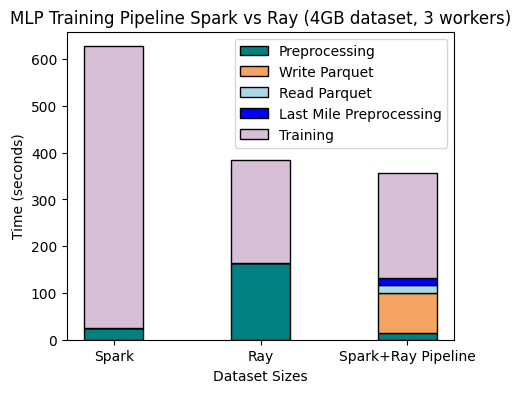

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
preproccessing = [24.67, 164.22, 15.41] # Spark, Ray, Pipeline

write_parquet = [0,0,85.31]
read_parquet = [0,0,15.87]
last_mile_prep = [0,0,15.41]

training = [602.74, 220.95, 224.04]

labels = ["Spark", "Ray", "Spark+Ray Pipeline"]
# Bar width
bar_width = 0.4
# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 4))

colors_edge = ['orange', 'blue', 'green']

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)), preproccessing, width=bar_width, label='Preprocessing', color='teal', edgecolor = 'black')


bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), write_parquet[i], width=bar_width, color='sandybrown', bottom=preproccessing[i], edgecolor = 'black',
           label='Write Parquet' if i == 0 else "")


bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), read_parquet[i], width=bar_width, color='lightblue', bottom=write_parquet[i]+preproccessing[i], edgecolor = 'black',
           label='Read Parquet' if i == 0 else "")


bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), last_mile_prep[i], width=bar_width, color='blue', bottom=read_parquet[i]+write_parquet[i]+preproccessing[i], edgecolor = 'black',
           label='Last Mile Preprocessing' if i == 0 else "")


# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(3):
    bottom_value = 0
    ax.bar(np.array([i]), training[i], width=bar_width, color='thistle', bottom=last_mile_prep[i]+read_parquet[i]+write_parquet[i]+preproccessing[i], edgecolor = 'black',
           label='Training' if i == 0 else "")

# Plot the Proposed Method data with specific color for Delta Transfer Time
#proposed_method_bars = ax.bar(np.arange(len(labels)) + 2 * bar_width, training, width=bar_width, label='Preprocess Ray', color='blue', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
#bottom = np.zeros(len(labels))
#for i in range(len(train_ray)):
#    ax.bar(np.array([i]) + 2*bar_width, train_ray[i], width=bar_width, color='skyblue', bottom=training[i], edgecolor = 'black',
#           label='Train Ray' if i == 0 else "")
# Set labels and title
ax.set_xlabel('Dataset Sizes')
ax.set_ylabel('Time (seconds)')
ax.set_title('MLP Training Pipeline Spark vs Ray (4GB dataset, 3 workers)')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.savefig('pipeline.pdf')

# Show the plot
plt.show()


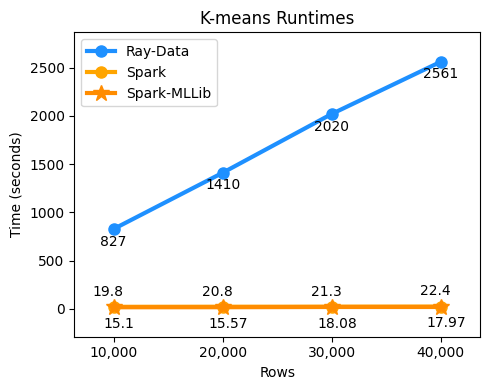

'\n\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

kmeans_ray = [827, 1410, 2020, 2561]

kmeans_spark = [19.8, 20.8,21.3, 22.4]

kmeans_spark_mllib = [15.10,15.57,18.08,17.97]

labels = ["10,000", "20,000", "30,000", "40,000"]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(labels, kmeans_ray, marker='o' , markerfacecolor='dodgerblue', markersize=8 ,  color='dodgerblue', linewidth=3, label=f'Ray-Data')

ax.plot(labels, kmeans_spark, marker='o' ,  markerfacecolor='orange', markersize=8,   color='orange', linewidth=3, label=f'Spark')

ax.plot(labels, kmeans_spark_mllib, marker='*' ,  markerfacecolor='darkorange', markersize=12,   color='darkorange', linewidth=3, label=f'Spark-MLLib')


# Set labels and title
ax.set_xlabel('Rows')
ax.set_ylabel('Time (seconds)')
ax.set_title('K-means Runtimes')
ax.legend(loc='upper left')

# Set discrete axis ticks only at specified points
ax.set_xticks(labels)

# Annotating points with values
for i, dataset_size in enumerate(labels):
    ax.annotate(kmeans_ray[i], (dataset_size, kmeans_ray[i]), textcoords="offset points", xytext=(0,-12), ha='center')
    ax.annotate(kmeans_spark[i], (dataset_size, kmeans_spark[i]), textcoords="offset points", xytext=(-4,8), ha='center')
    ax.annotate(kmeans_spark_mllib[i], (dataset_size, kmeans_spark[i]), textcoords="offset points", xytext=(4,-15), ha='center')


ax.margins(x=0.12, y=0.12)
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('kmeans.pdf')

plt.show()
'''

'''


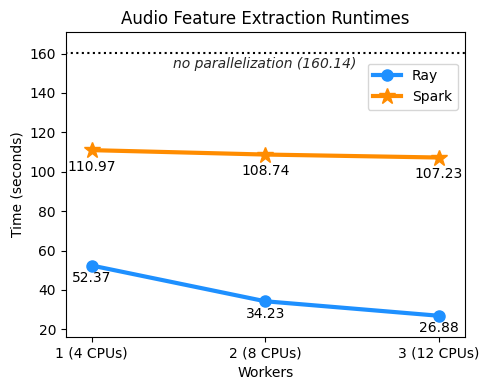

'\n\n'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

ray_emotions = [52.37, 34.23, 26.88]

spark_emotions = [110.97, 108.74, 107.23]

labels = ["1 (4 CPUs)", "2 (8 CPUs)", "3 (12 CPUs)"]


# Plotting
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(labels, ray_emotions, marker='o' , markerfacecolor='dodgerblue', markersize=8 ,  color='dodgerblue', linewidth=3, label=f'Ray')

#ax.plot(labels, kmeans_spark, marker='o' ,  markerfacecolor='orange', markersize=8,   color='orange', linewidth=3, label=f'Spark')

ax.plot(labels, spark_emotions, marker='*' ,  markerfacecolor='darkorange', markersize=12,   color='darkorange', linewidth=3, label=f'Spark')


plt.hlines(y=160.14, xmin=-1, xmax=3, linestyle='dotted', color="black")

# add an annotation above the horizontal line at the center
plt.annotate('no parallelization (160.14)', xy=(1, 151), ha='center', va='bottom', fontstyle='italic', alpha=0.85)

# Set labels and title
ax.set_xlabel('Workers')
ax.set_ylabel('Time (seconds)')
ax.set_title('Audio Feature Extraction Runtimes')
ax.legend(loc='upper right',bbox_to_anchor=(1, 0.92))

# Set discrete axis ticks only at specified points
ax.set_xticks(labels)

# Annotating points with values
for i, workers in enumerate(labels):
    ax.annotate(ray_emotions[i], (workers, ray_emotions[i]), textcoords="offset points", xytext=(0,-12), ha='center')
    ax.annotate(spark_emotions[i], (workers, spark_emotions[i]), textcoords="offset points", xytext=(0,-15), ha='center')
dx =0.15
plt.xlim(-dx,2+dx)
ax.margins(x=0.08, y=0.08)
ax.set_xticklabels(labels)
plt.tight_layout()
plt.savefig('llibrosa.pdf')

plt.show()
'''

'''


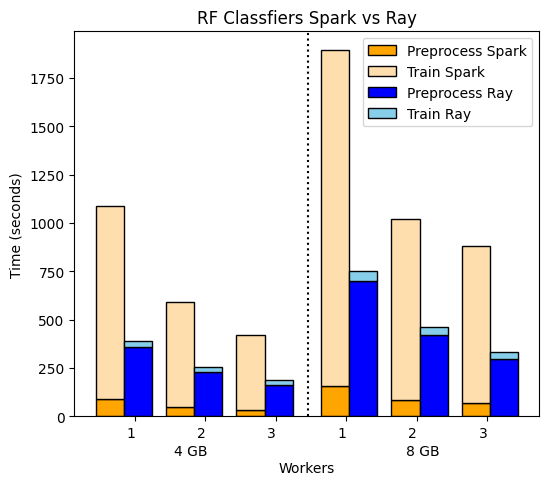

In [53]:
import numpy as np


proc_ray_4 = [360, 229, 164]
train_ray_4 = [31, 25, 24]

proc_ray_8 = [700, 423, 296]
train_ray_8 = [54, 39, 38]

proc_spark_4 = [90,49,35]
train_spark_4 = [1000,544,387]

proc_spark_8 = [156, 83,69]
train_spark_8 = [1740, 939, 811]

labels2 = ["1", "2", "3", "1", "2", "3"]

labels = ["1", "2", "3"]
# Bar width
bar_width = 0.4
# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 5))

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) +  bar_width, proc_spark_4, width=bar_width, label='Preprocess Spark', color='orange', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_spark_4)):
    bottom_value = 0
    ax.bar(np.array([i]) + bar_width, train_spark_4[i], width=bar_width, color='navajowhite', bottom=proc_spark_4[i], edgecolor = 'black',
           label='Train Spark' if i == 0 else "")

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) + 2 * bar_width, proc_ray_4, width=bar_width, label='Preprocess Ray', color='blue', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_ray_4)):
    ax.bar(np.array([i]) + 2*bar_width, train_ray_4[i], width=bar_width, color='skyblue', bottom=proc_ray_4[i], edgecolor = 'black',
           label='Train Ray' if i == 0 else "")

#########################


# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) +  9* bar_width, proc_spark_8, width=bar_width,  color='orange', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_spark_8)):
    bottom_value = 0
    ax.bar(np.array([i]) + 9*bar_width, train_spark_8[i], width=bar_width, color='navajowhite', bottom=proc_spark_8[i], edgecolor = 'black')

# Plot the Proposed Method data with specific color for Delta Transfer Time
proposed_method_bars = ax.bar(np.arange(len(labels)) + 10 * bar_width, proc_ray_8, width=bar_width, color='blue', edgecolor = 'black')

# Add the Delta Transfer Time as a different color on top of Proposed Method bars
bottom = np.zeros(len(labels))
for i in range(len(train_ray_8)):
    ax.bar(np.array([i]) + 10 *bar_width, train_ray_8[i], width=bar_width, color='skyblue', bottom=proc_ray_8[i], edgecolor = 'black')
# Adding the dotted line in the middle
ax.axvline(x=3.22, color='black', linestyle='dotted', linewidth=1.5)

# Set labels and title
ax.set_xlabel('Workers', labelpad=15)
ax.set_ylabel('Time (seconds)')
ax.set_title('RF Classfiers Spark vs Ray')
ax.set_xticks(np.arange(len(labels2)) + 1.9*bar_width)
ax.set_xticklabels(labels2, ha="right")

ax.text(0.25, -0.1, '4 GB', transform=ax.transAxes, ha='center', fontsize=10)
ax.text(0.75, -0.1, '8 GB', transform=ax.transAxes, ha='center', fontsize=10)
ax.legend()
plt.savefig('rf.pdf', bbox_inches='tight')

# Show the plot
plt.show()
